In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

The components of the closed economy AS-AD model are:

- IS: $\tilde Y_t = \bar a - \bar b(R_t - \bar r)$
- MPR: $R_t - \bar r = \psi (\pi_t - \bar \pi) + \phi \tilde Y_t$
- PC: $\pi_t = \pi_{t-1} + \bar \nu \tilde Y_t + \bar o_t$



So we have:
- AS: $\pi_t = \pi_{t-1} + \bar \nu \tilde Y_t + \bar o_t$
- AD: $\tilde Y_t = \frac{\bar a}{1+\phi \bar b } - \frac{\psi \bar b }{1+ \phi \bar b } (\pi_t - \bar \pi)$



We can substitute the AD equation into the AS equation, letting $\hat a:= \frac{\bar a}{1+ \phi \bar b}$ and $\hat b:= \frac{\bar b}{1+\phi \bar b }$:

$$\pi_t = \pi_{t-1} + \bar \nu \psi \left( \hat a - \hat b (\pi_t - \bar \pi) \right) + \bar o_t$$



Adding $\bar \nu \psi \hat b (\pi_t - \bar \pi) - \bar \pi$ to both sides and factorising the left-hand side:

$$(1 + \bar \nu \psi \hat b)(\pi_t - \bar \pi) = \pi_{t-1}  + \bar \nu \hat a + \bar o_t - \bar \pi$$ 



Dividing through by $(1 + \bar \nu \psi \hat b)$:

$$\pi_t - \bar \pi  = \frac{\bar \nu \hat a}{1 + \bar \nu \psi \hat b} + \frac{\pi_{t-1} -\bar \pi + \bar o_t }{1 + \bar \nu \psi \hat b} $$


This can be tidied up by letting $\check a:= \frac{\hat a}{1+\bar \nu \psi \hat b} = \frac{\bar a}{1 + \phi \bar b  + \bar \nu \psi \bar b}$ and $\check b:= \frac{\hat b}{1+ \bar \nu \psi \hat b} = \frac{\bar b}{1+\phi \bar b + \bar \nu \psi \bar b}$.

Note that since $1-\bar \nu \psi \check b = 1-\frac{\bar \nu \psi \hat b }{1+ \bar \nu \psi \hat b} = \frac{1+ \bar \nu \psi \hat b - \bar \nu \psi \hat b }{1+ \bar \nu \psi \hat b} = \frac{1}{1+ \bar \nu \psi \hat b}$, we can put the denominator of the second term in the form $(1-\bar \nu \psi \check b)$:

$$\pi_t - \bar \pi = \bar \nu \check a + (1-\bar \nu  \psi \check b)(\pi_{t-1} - \bar \pi + \bar o_t)$$


We can use the fact that $\check a = \frac{\bar a}{1 + \phi \bar b  + \bar \nu \psi \bar b}$ and $\check b = \frac{\bar b}{1+\phi \bar b + \bar \nu \psi \bar b}$ to put it in terms of the original parameters.


**The inflation gap is**
$$\pi_t - \bar \pi = \frac{\bar \nu \bar a}{1 + \phi \bar b + \bar \nu \psi \bar b} + \frac{1 + \phi \bar b}{1+\phi \bar b + \bar \nu \psi \bar b}(\pi_{t-1} - \bar \pi + \bar o_t)$$



Substituting the neater version of AS (with $\check a$ and $\check b$) into our AD equation (we'll again temporarily use $\hat a$ and $\hat b$  and return to our original parameters $\bar a$ and $\bar b$ at the end):
$$\tilde Y_t = \hat a - \psi  \hat b (\bar \nu \check a + (1-\bar \nu  \psi \check b)(\pi_{t-1} - \bar \pi + \bar o_t))$$


Multiplying out the brackets and substituting $\hat a$ for $(1+ \bar \nu \psi \hat b)\check a$:

$$\tilde Y_t = (1+ \bar \nu \psi \hat b)\check a -  \psi \hat b \bar \nu \check a - \psi \hat b (1-\bar \nu  \psi \check b)(\pi_{t-1} - \bar \pi + \bar o_t))$$

$$= \check a - \psi \hat b (1-\bar \nu  \psi \check b)(\pi_{t-1} - \bar \pi + \bar o_t))$$

Remember that $(1-\bar \nu \psi \check b) = \frac{1}{1+ \bar \nu \psi \hat b}$, so substituting this back in, we get:

$$\tilde Y_t = \check a - \frac{\psi \hat b}{1+ \bar \nu \psi \hat b}(\pi_{t-1} - \bar \pi + \bar o_t)$$

But we defined $\check b:= \frac{\hat b}{1+ \bar \nu \psi \hat b}$, so the fraction can be tidied up to:

$$\tilde Y_t = \check a - \psi \check b(\pi_{t-1} - \bar \pi + \bar o_t)$$

**In terms of the original parameters, the output gap is:**
$$\tilde Y_t = \frac{\bar a}{1+\phi \bar b + \bar \nu \psi \bar b} - \psi \frac{\bar b}{1+\phi \bar b + \bar \nu \psi \bar b}(\pi_{t-1} - \bar \pi + \bar o_t)$$

## Setup

In [5]:
# Parameters
A_BAR = 0  # Demand shocks
B_BAR = 0.5  # Sensitivity of investment & consumption to real interest rate deviations
R_BAR = 2  # MP_K; Long-run real interest rate (%)
PI_BAR = 2  # Inflation target (%)
PSI = 0.5  # Inflation deviation sensitivity
PHI = 0.5  # Output gap sensitivity
NU_BAR = 0.5  # Sensitivity of inflation expectations to output gap
O_BAR = 0.0  # Supply shocks

## Plotting AS/AD and changing parameters

In [6]:
# Generate values for plotting
Y_tilde_values = np.linspace(-10, 10, 400)
pi_values = np.linspace(-10, 10, 400)

In [7]:
def AS_curve(Y_tilde_t, pi_bar, nu_bar, o_bar, steady_state=True):
    if not steady_state:
        raise NotImplementedError
    return pi_bar + nu_bar * Y_tilde_t + o_bar

def AD_curve(pi_t, pi_bar, a_bar, b_bar, psi, phi, steady_state=True):
    if not steady_state:
        raise NotImplementedError
    return a_bar / (1 + b_bar * phi) - b_bar * psi / (1 + b_bar * phi) * (pi_t - pi_bar)

In [8]:
def plot_curves(a_bar, b_bar, pi_bar, nu_bar, o_bar, psi, phi):
    # Calculate corresponding values for AS curve and AD curve
    AS_values = AS_curve(Y_tilde_values, pi_bar, nu_bar, o_bar)
    AD_values = AD_curve(pi_values, pi_bar, a_bar, b_bar, psi, phi)

    # Plot the AS curve and AD curve
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(Y_tilde_values, AS_values, label=r'AS: $\pi_t = \pi_{t-1} + \bar \nu \tilde Y_t + \bar o_t$', color='blue')
    ax.plot(AD_values, pi_values, label=r'AD: $\tilde Y_t = \frac{\bar a}{1+\bar b \phi} - \frac{\bar b \psi}{1+\bar b \phi} (\pi_t - \bar \pi)$', color='red')
    ax.set_xlabel('Output Gap, $\\tilde{Y}$')
    ax.set_ylabel('Inflation Rate, $\\pi$')
    ax.set_title('AS-AD Model')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.axhline(pi_bar, color='green', linestyle='--', label='$\\bar \\pi = 2\\%$')
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.legend(loc='lower left')
    plt.show()


In [9]:
# Create sliders for parameters
a_bar_slider = widgets.FloatSlider(value=A_BAR, min=-10, max=10, step=0.1, description=r'$a_{bar}$:')
b_bar_slider = widgets.FloatSlider(value=B_BAR, min=0.1, max=1, step=0.01, description=r'$b_{bar}$:')
pi_bar_slider = widgets.FloatSlider(value=PI_BAR, min=-5, max=5, step=0.1, description=r'$\pi_{bar}$:')
nu_bar_slider = widgets.FloatSlider(value=NU_BAR, min=0, max=1, step=0.01, description=r'$\nu_{bar}$:')
o_bar_slider = widgets.FloatSlider(value=O_BAR, min=-10, max=10, step=0.1, description=r'$o_{bar}$:')
psi_slider = widgets.FloatSlider(value=PSI, min=0, max=100, step=0.1, description=r'$\psi$:')
phi_slider = widgets.FloatSlider(value=PHI, min=0, max=100, step=0.1, description=r'$\phi$:')

In [ ]:
# Create interactive widget
widgets.interact(plot_curves, a_bar=a_bar_slider, b_bar=b_bar_slider, pi_bar=pi_bar_slider,
                 nu_bar=nu_bar_slider, o_bar=o_bar_slider, psi=psi_slider, phi=phi_slider)
# note that the LaTeX isn't rendering properly; see https://stackoverflow.com/questions/77360575/how-to-get-latex-symbol-rendering-correctly-in-ipywidgets 

interactive(children=(FloatSlider(value=0.0, description='$a_{bar}$:', max=10.0, min=-10.0), FloatSlider(value…

<function __main__.plot_curves(a_bar, b_bar, pi_bar, nu_bar, o_bar, psi, phi)>

## Dynamic model

For now, we'll explicitly solve the model for $\pi_t$ and $\tilde Y_t$ using the analytic equations found above. A next step would be to use numerical methods to solve the model.

In [11]:
def pi_t(pi_t_minus_1, pi_bar, a_bar, b_bar, psi, phi, nu_bar, o_bar_t):
    return pi_bar + nu_bar * a_bar / (1 + phi * b_bar + nu_bar * psi * b_bar) + (1 + phi * b_bar) / (1 + phi * b_bar + nu_bar * psi * b_bar) * (pi_t_minus_1 - pi_bar + o_bar_t)

def Y_tilde_t(pi_t_minus_1, pi_bar, a_bar, b_bar, psi, phi, nu_bar, o_bar_t):
    return a_bar / (1 + b_bar * phi + nu_bar * psi * b_bar) - psi * b_bar / (1 + phi * b_bar + nu_bar * psi * b_bar) * (pi_t_minus_1 - pi_bar + o_bar_t)

First, just check that the model is stable in its steady state.

In [12]:
# Time parameters
T = 100
time = np.arange(0, T)

# Arrays to store results
Y_tildes = np.zeros_like(time)
pis = np.zeros_like(time)

# Initial conditions
Y_tilde_0 = 0
pi_0 = PI_BAR

Y_tildes[0] = Y_tilde_0
pis[0] = pi_0

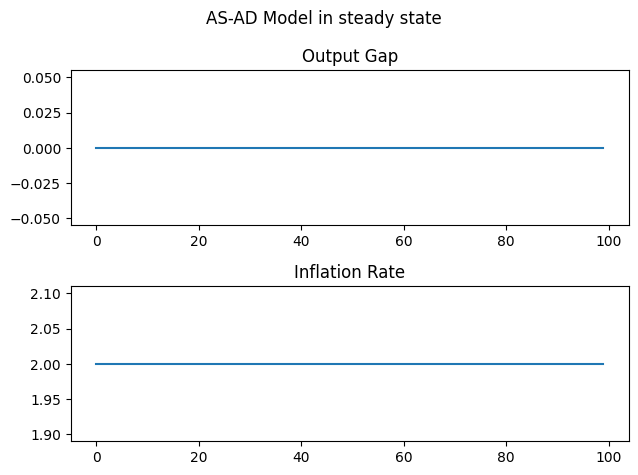

In [13]:
for t in range(1, T):
    Y_tildes[t] = Y_tilde_t(pis[t - 1], PI_BAR, A_BAR, B_BAR, PSI, PHI, NU_BAR, O_BAR)
    pis[t] = pi_t(pis[t - 1], PI_BAR, A_BAR, B_BAR, PSI, PHI, NU_BAR, O_BAR)
fig, axs = plt.subplots(2, 1)
axs[0].plot(time, Y_tildes, label='Output Gap, $\\tilde{Y}$')
axs[0].set_title('Output Gap')
axs[1].plot(time, pis, label='Inflation Rate, $\\pi$')
axs[1].set_title('Inflation Rate')
fig.suptitle('AS-AD Model in steady state')
plt.tight_layout()

### Experiments



#### Supply shock

In [14]:
# Time parameters
T = 100
time = np.arange(0, T)

# Arrays to store results
Y_tildes = np.zeros_like(time, dtype=float)
pis = np.zeros_like(time, dtype=float)

# Initial conditions
Y_tilde_0 = 0
pi_0 = PI_BAR

Y_tildes[0] = Y_tilde_0
pis[0] = pi_0

# Setting up a negative supply shock in period 5
o_bars = np.zeros_like(time, dtype=float)
o_bars[10] = 1

In [15]:
for t in range(1, T):
    Y_tildes[t] = Y_tilde_t(pis[t - 1], PI_BAR, A_BAR, B_BAR, PSI, PHI, NU_BAR, o_bars[t])
    pis[t] = pi_t(pis[t - 1], PI_BAR, A_BAR, B_BAR, PSI, PHI, NU_BAR, o_bars[t])

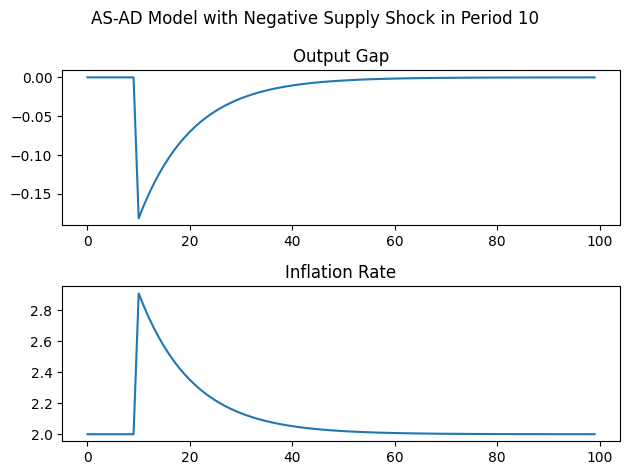

In [16]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(time, Y_tildes, label='Output Gap, $\\tilde{Y}$')
axs[0].set_title('Output Gap')
axs[1].plot(time, pis, label='Inflation Rate, $\\pi$')
axs[1].set_title('Inflation Rate')
fig.suptitle('AS-AD Model with Negative Supply Shock in Period 10')
plt.tight_layout()

What is the effect of the policy parameters $\phi$ and $\psi$ on the response of the economy to a supply shock?

In [48]:
def simulate_supply_shock(psi, phi, T=100):
    # Time parameters
    time = np.arange(0, T)

    # Arrays to store results
    Y_tildes = np.zeros_like(time, dtype=float)
    pis = np.zeros_like(time, dtype=float)

    # Initial conditions
    Y_tilde_0 = 0
    pi_0 = PI_BAR

    Y_tildes[0] = Y_tilde_0
    pis[0] = pi_0

    # Setting up a negative supply shock in period 5
    o_bars = np.zeros_like(time, dtype=float)
    o_bars[10] = 1

    for t in range(1, T):
        Y_tildes[t] = Y_tilde_t(pis[t - 1], PI_BAR, A_BAR, B_BAR, psi, phi, NU_BAR, o_bars[t])
        pis[t] = pi_t(pis[t - 1], PI_BAR, A_BAR, B_BAR, psi, phi, NU_BAR, o_bars[t])
    return Y_tildes, pis

In [53]:
# Define the range of psi and phi parameters
psi_values = np.logspace(0, 2, num=4)
phi_values = np.logspace(0, 2, num=4)

# Initialize lists to store results
output_gaps = []
inflations = []

# NOTE I think it would be better to store the results as (Y_tilde, pi) tuples in a 3D array (phi x psi x T) from the start, rather than reshaping later on

In [54]:
# Run grid search
for psi in (psi_values):
    for phi in phi_values:
        # Run the simulation with the current psi and phi
        output_gap, inflation = simulate_supply_shock(psi, phi, T)
        output_gaps.append(output_gap)
        inflations.append(inflation)

In [55]:
# Reshape results to match the grid layout
output_gaps = np.array(output_gaps).reshape(len(psi_values), len(phi_values), T)
inflations = np.array(inflations).reshape(len(psi_values), len(phi_values), T)

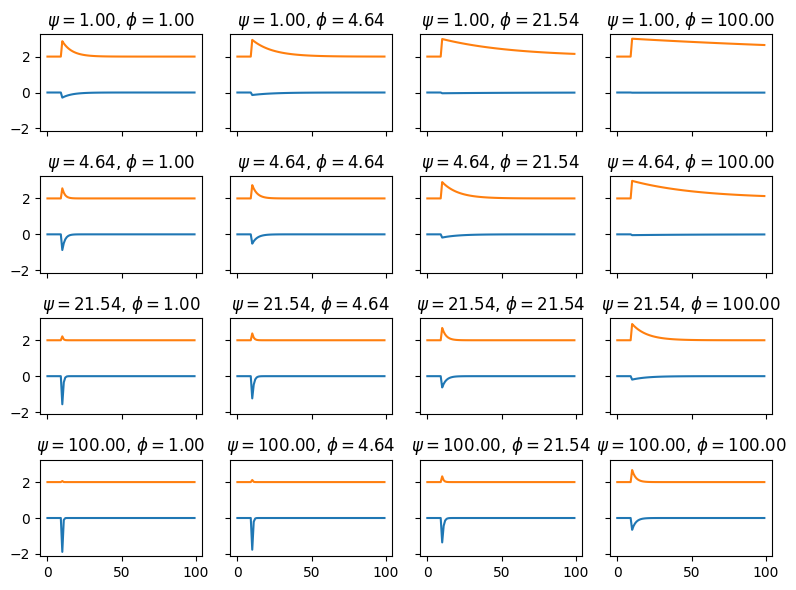

In [61]:
# Plot the time series of output gap and inflation
fig, axs = plt.subplots(len(psi_values), len(phi_values), sharex=True, sharey=True, figsize=(8, 6))
for i, psi in enumerate(psi_values):
    for j, phi in enumerate(phi_values):
        axs[i, j].plot(output_gaps[i, j], label='Output gap')
        axs[i, j].plot(inflations[i, j], label='Inflation')
        axs[i, j].set_title(f'$\\psi = {psi:.2f}$, $\\phi = {phi:.2f}$')
fig.suptitle('Output gap and inflation with a 1% negative supply shock in period 10')
fig.tight_layout()
plt.show()
# TODO put a legend on the plot

In [78]:
def plot_supply_shock(psi, phi):
    output_gap, inflation = simulate_supply_shock(psi, phi, T=100)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(output_gap, label='Output gap')
    ax.plot(inflation, label='Inflation')
    ax.legend()
    ax.set(title = 'Output gap and inflation with a 1% negative supply shock in period 10',
              xlabel = 'Time',
              ylabel = 'Level')
    plt.show()

In [79]:
# Create sliders for parameters
psi_slider = widgets.FloatSlider(value=PSI, min=0, max=100, step=0.1, description=r'$\psi$:')
phi_slider = widgets.FloatSlider(value=PHI, min=0, max=100, step=0.1, description=r'$\phi$:')

widgets.interact(plot_supply_shock, psi=psi_slider, phi=phi_slider)

interactive(children=(FloatSlider(value=0.5, description='$\\psi$:'), FloatSlider(value=0.5, description='$\\p…

<function __main__.plot_simulation(psi, phi)>

#### Demand shock

In [80]:
def simulate_demand_shock(psi, phi, T=100):
    # Time parameters
    time = np.arange(0, T)

    # Arrays to store results
    Y_tildes = np.zeros_like(time, dtype=float)
    pis = np.zeros_like(time, dtype=float)

    # Initial conditions
    Y_tilde_0 = 0
    pi_0 = PI_BAR

    Y_tildes[0] = Y_tilde_0
    pis[0] = pi_0

    # Setting up a positive demand shock in period 5
    a_bars = np.zeros_like(time, dtype=float)
    a_bars[10] = 1

    for t in range(1, T):
        Y_tildes[t] = Y_tilde_t(pis[t - 1], PI_BAR, a_bars[t], B_BAR, psi, phi, NU_BAR, O_BAR)
        pis[t] = pi_t(pis[t - 1], PI_BAR, a_bars[t], B_BAR, psi, phi, NU_BAR, O_BAR)
    return Y_tildes, pis

In [83]:
def plot_demand_shock(psi, phi):
    output_gap, inflation = simulate_demand_shock(psi, phi, T=100)
    fig, ax = plt.subplots()
    ax.plot(output_gap, label='Output gap')
    ax.plot(inflation, label='Inflation')
    ax.legend()
    ax.set(title = 'Output gap and inflation with a 1% positive demand shock in period 10',
              xlabel = 'Time',
              ylabel = 'Level')
    plt.show()

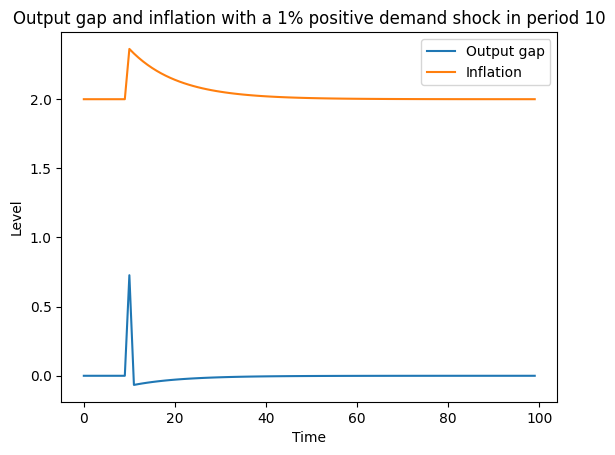

In [84]:
plot_demand_shock(PSI, PHI)

In [ ]:
# Define the range of psi and phi parameters
psi_values = np.logspace(0, 2, num=4)
phi_values = np.logspace(0, 2, num=4)

# Initialize lists to store results
output_gaps = []
inflations = []

# NOTE I think it would be better to store the results as (Y_tilde, pi) tuples in a 3D array (phi x psi x T) from the start, rather than reshaping later on

# Run grid search
for psi in (psi_values):
    for phi in phi_values:
        # Run the simulation with the current psi and phi
        output_gap, inflation = simulate_demand_shock(psi, phi, T)
        output_gaps.append(output_gap)
        inflations.append(inflation)
# Reshape results to match the grid layout
output_gaps = np.array(output_gaps).reshape(len(psi_values), len(phi_values), T)
inflations = np.array(inflations).reshape(len(psi_values), len(phi_values), T)
# Plot the time series of output gap and inflation
fig, axs = plt.subplots(len(psi_values), len(phi_values), sharex=True, sharey=True, figsize=(8, 6))
for i, psi in enumerate(psi_values):
    for j, phi in enumerate(phi_values):
        axs[i, j].plot(output_gaps[i, j], label='Output gap')
        axs[i, j].plot(inflations[i, j], label='Inflation')
        axs[i, j].set_title(f'$\\psi = {psi:.2f}$, $\\phi = {phi:.2f}$')
fig.suptitle('Output gap and inflation with a 1% positive demand shock in period 10')
fig.tight_layout()
plt.show()
# TODO put a legend on the plot

In [ ]:
# Create sliders for parameters
psi_slider = widgets.FloatSlider(value=PSI, min=0, max=100, step=0.1, description=r'$\psi$:')
phi_slider = widgets.FloatSlider(value=PHI, min=0, max=100, step=0.1, description=r'$\phi$:')

widgets.interact(plot_demand_shock, psi=psi_slider, phi=phi_slider)

#### Generalised shock

In [ ]:
def run_simulation(a_bar, b_bar, pi_bar, nu_bar, o_bar, psi, phi, T=100)

In [ ]:
# Create sliders for parameters
a_bar_slider = widgets.FloatSlider(value=A_BAR, min=-10, max=10, step=0.1, description=r'$a_{bar}$:')
b_bar_slider = widgets.FloatSlider(value=B_BAR, min=0.1, max=1, step=0.01, description=r'$b_{bar}$:')
pi_bar_slider = widgets.FloatSlider(value=PI_BAR, min=-5, max=5, step=0.1, description=r'$\pi_{bar}$:')
nu_bar_slider = widgets.FloatSlider(value=NU_BAR, min=0, max=1, step=0.01, description=r'$\nu_{bar}$:')
o_bar_slider = widgets.FloatSlider(value=O_BAR, min=-10, max=10, step=0.1, description=r'$o_{bar}$:')
psi_slider = widgets.FloatSlider(value=PSI, min=0, max=100, step=0.1, description=r'$\psi$:')
phi_slider = widgets.FloatSlider(value=PHI, min=0, max=100, step=0.1, description=r'$\phi$:')

widgets.interact(plot_simulation, a_bar=a_bar_slider, b_bar=b_bar_slider, pi_bar=pi_bar_slider,
                 nu_bar=nu_bar_slider, o_bar=o_bar_slider, psi=psi_slider, phi=phi_slider)

## Dark mode options (a bit untidy)

In [9]:
from IPython.display import display, HTML

In [74]:
# Enable dark mode for ipywidgets
dark_mode_css = """
<style>
.widget-label, .widget-button, .widget-toggle-button, .widget-tab, .widget-text, .widget-dropdown, .widget-select > select, .widget-slider > .widget-label > .widget-readout, .widget-textarea, .widget-colorpicker, .widget-numeric input, .widget-upload > .widget-button, .widget-datepicker > .p-Widget > .p-Widget-control > .p-Widget > .p-Widget-control, .widget-datepicker > .p-Widget > .p-Widget-control > .p-Widget > .p-Widget-control input {
    background-color: #333;
}
.widget-container {
    background-color: #222;
}
</style>
"""
display(HTML(dark_mode_css))

plt.style.use('dark_background')

In [10]:
# Reset ipywidgets to default styles
reset_css = """
<style>
/* Reset background-color for ipywidgets */
.widget-label, .widget-button, .widget-toggle-button, .widget-tab, .widget-text, .widget-dropdown, .widget-select > select, .widget-slider > .widget-label > .widget-readout, .widget-textarea, .widget-colorpicker, .widget-numeric input, .widget-upload > .widget-button, .widget-datepicker > .p-Widget > .p-Widget-control > .p-Widget > .p-Widget-control, .widget-datepicker > .p-Widget > .p-Widget-control > .p-Widget > .p-Widget-control input {
    background-color: inherit;
}
/* Reset background-color for widget containers */
.widget-container {
    background-color: inherit;
}
</style>
"""
display(HTML(reset_css))